![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

import sklearn.model_selection as skm

from sklearn.tree import (
    DecisionTreeRegressor as DTR,
    DecisionTreeClassifier as DTC
)
from sklearn.ensemble import (
    BaggingClassifier as BC,
    VotingClassifier as VC
)
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    f1_score
)
from sklearn.linear_model import (
    LinearRegression as LIR,
    LogisticRegression as LR
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [64]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('../data/raw/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [65]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

La variable "season" representa la estación del año en la que se registraron los datos, codificada de la siguiente 
manera:
1: Primavera
2: Verano
3: Otoño
4: Invierno

Según el análisis descriptivo realizado, se observa lo siguiente:
La media de alquileres de bicicletas es más alta en el verano, el otoño, el invierno y finalmente la primavera.

In [66]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

La variable "hour" representa la hora del día en la que se registraron los datos, variando de 0 a 23.
El análisis descriptivo revela lo siguiente:
- La distribución de alquileres de bicicletas a lo largo del día muestra un patrón bimodal.
- Las horas con mayor demanda de alquileres parecen ser alrededor de las 8 de la mañana y las 5-6 de la tarde, coincidiendo probablemente con las horas de entrada y salida del trabajo, respectivamente.
- Las horas de menor demanda se observan durante la madrugada, especialmente entre las 2 y las 4 de la mañana, lo cual es comprensible dada la baja actividad durante esas horas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

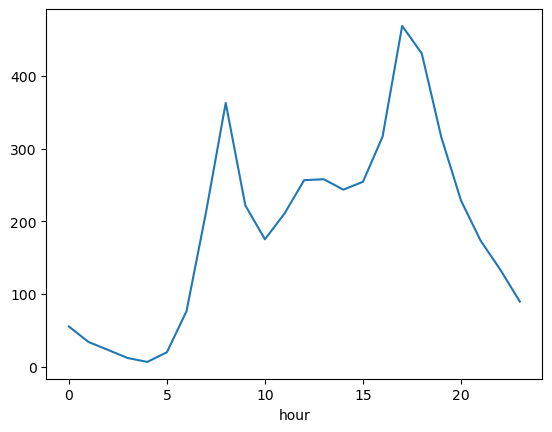

In [67]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

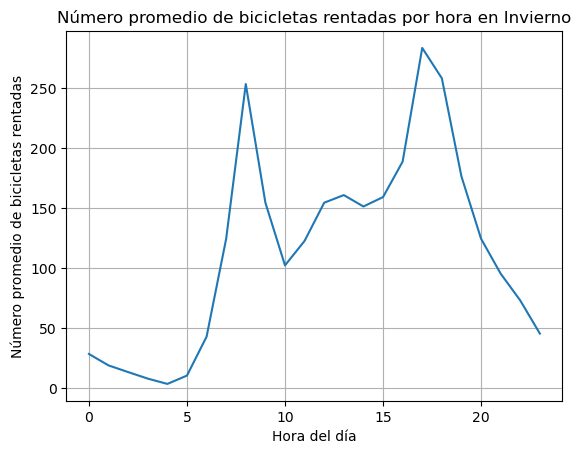

In [68]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()
plt.title('Número promedio de bicicletas rentadas por hora en Invierno')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.grid(True)
plt.show()

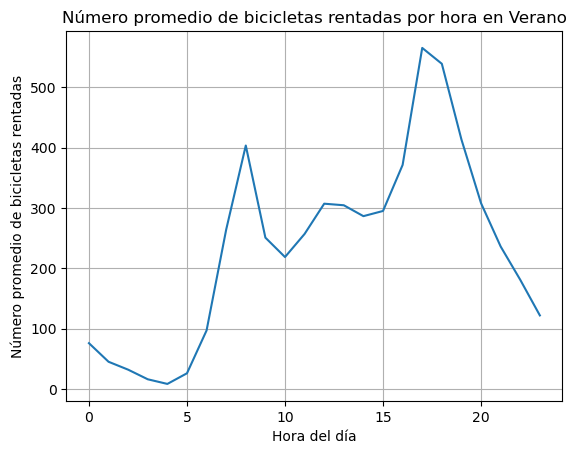

In [69]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()
plt.title('Número promedio de bicicletas rentadas por hora en Verano')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.grid(True)
plt.show()

- Durante el invierno, la demanda de alquiler de bicicletas muestra un patrón más marcado con picos claros en las horas 
punta.
- Se observa un pico pronunciado en la mañana alrededor de las 8 am y otro en la tarde alrededor de las 5-6 pm, lo 
cual coincide con los momentos típicos de entrada y salida del trabajo.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [78]:
# Celda 3
X = bikes[['season', 'hour']]
y = bikes['total']
feature_names = list(X.columns)

X_train, X_test, y_train, y_test = skm.train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

lir_rg = LIR()

column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop='first'), [0])],
    remainder='passthrough'
)

model = Pipeline(
    steps=[('preprocessor', column_transformer), ('regressor', lir_rg)]
)

model.fit(X_train, y_train)

coefficients = model.named_steps['regressor'].coef_
intercept = model.named_steps['regressor'].intercept_

print("Coeficientes:")
print("Intercepto:", intercept)
print("Coeficientes de season:", coefficients[:3])
print("Coeficiente de hour:", coefficients[3])

print("\nInterpretación:")
print("- El intercepto representa el número promedio de bicicletas alquiladas cuando season=2 (Verano) y hour=0.")
print("- El coeficiente de season indica el cambio promedio en el número de bicicletas alquiladas cuando season cambia"
      " de 1 a 2 o de 3 a 4, manteniendo la hora constante.")
print("- El coeficiente de hour indica el cambio promedio en el número de bicicletas alquiladas por cada unidad de "
      "cambio en la hora del día, manteniendo la estación constante.")

Coeficientes:
Intercepto: -6.8613447465002935
Coeficientes de season: [ 99.24935554 118.61364466  86.34787834]
Coeficiente de hour: 10.539270975673817

Interpretación:
- El intercepto representa el número promedio de bicicletas alquiladas cuando season=2 (Verano) y hour=0.
- El coeficiente de season indica el cambio promedio en el número de bicicletas alquiladas cuando season cambia de 1 a 2 o de 3 a 4, manteniendo la hora constante.
- El coeficiente de hour indica el cambio promedio en el número de bicicletas alquiladas por cada unidad de cambio en la hora del día, manteniendo la estación constante.


La regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. En este caso, es posible que la relación entre la hora del día y el número de bicicletas alquiladas no sea estrictamente lineal, especialmente si hay efectos no lineales como picos durante ciertas horas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [83]:
# Celda 4
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):

    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    n_l = y_l.shape[0]
    n_r = y_r.shape[0]

    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)

    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)

    return gini_impurity_

def best_split(X, y, num_pct=10):

    features = range(X.shape[1])

    best_split = [0, 0, 0]  # j, split, gain

    # Para todas las varibles 
    for j in features:

        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]

        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)

            if gain > best_split[2]:
                best_split = [j, split, gain]

    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):

    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree

    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)

    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5)
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 

    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree

            # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición

    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)

    return tree

tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)

{'y_pred': 1,
 'y_prob': 190.8118254879449,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 8708,
 'gain': 18225.48257905194,
 'sl': {'y_pred': 1,
  'y_prob': 54.986115931968065,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 2879,
  'gain': 6976.900556961125,
  'sl': {'y_pred': 1,
   'y_prob': 32.599444223898374,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 2517,
   'gain': 607.6218415621652,
   'sl': {'y_pred': 1,
    'y_prob': 25.42339832869081,
    'level': 3,
    'split': -1,
    'n_samples': 2152,
    'gain': 396.10111004989835},
   'sr': {'y_pred': 1,
    'y_prob': 74.54223433242507,
    'level': 3,
    'split': -1,
    'n_samples': 365,
    'gain': 662.1525156817661}},
  'sr': {'y_pred': 1,
   'y_prob': 209.6098901098901,
   'level': 2,
   'split': [0, 2.0],
   'n_samples': 362,
   'gain': 4813.612561990536,
   'sl': {'y_pred': 1,
    'y_prob': 122.10989010989012,
    'level': 3,
    'split': -1,
    'n_samples': 89,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_prob'

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [44]:
# Celda 5
tree_rg = DTR(criterion='squared_error', random_state=0)
tree_rg.fit(X_train, y_train)

ccp_path = tree_rg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(10, random_state=1, shuffle=True)
grid = skm.GridSearchCV(
    tree_rg, 
    {'ccp_alpha': ccp_path.ccp_alphas},
    refit=True,
    cv=kfold,
    scoring='neg_root_mean_squared_error'
)
grid.fit(X_train, y_train)
best_ = grid.best_estimator_
mean_squared_error(y_test, best_.predict(X_test))

13368.224861302493

En otras palabras, el MSE del conjunto de validación asociado con el árbol de regresión es 13.368. Por lo tanto, la 
raíz cuadrada del MSE es de alrededor de 115, lo que indica que este modelo conduce a predicciones de validación que 
están alrededor de 115 bicicletas del valor medio real del número de bicicletas alquiladas.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [57]:
# Lectura de la información de archivo .csv
df = pd.read_csv('../data/raw/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [58]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [59]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [60]:
# Celda 6
log_clf = LR()
log_clf.fit(X_train, y_train)

tree_clf = DTC(criterion='entropy', random_state=0)
tree_clf.fit(X_train, y_train)

ccp_path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5, random_state=1, shuffle=True)
grid = skm.GridSearchCV(
    tree_clf,
    {'ccp_alpha': ccp_path.ccp_alphas},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)

In [61]:
grid.fit(X_train, y_train)
best_ = grid.best_estimator_

print("\nDesempeño de la regresión logística:")
print("Accuracy:", accuracy_score(y_test, log_clf.predict(X_test)))
print("F1-Score:", f1_score(y_test, log_clf.predict(X_test)))
print("Desempeño del árbol de decisión:")
print("Accuracy:", accuracy_score(y_test, best_.predict(X_test)))
print("F1-Score:", f1_score(y_test, best_.predict(X_test)))


Desempeño de la regresión logística:
Accuracy: 0.6133333333333333
F1-Score: 0.6096904441453566
Desempeño del árbol de decisión:
Accuracy: 0.6453333333333333
F1-Score: 0.6448598130841121


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [52]:
# Celda 7
model_1 = DTC(max_depth=3, random_state=0)
bagged1 = BC(
    base_estimator=model_1, 
    n_estimators=100, 
    random_state=0,
    oob_score=True
).fit(X_train, y_train)

model_2 = DTC(min_samples_leaf=5, random_state=0)
bagged2 = BC(
    base_estimator=model_2, 
    n_estimators=100, 
    random_state=0,
    oob_score=True
).fit(X_train, y_train)

model_3 = LR()
bagged3 = BC(
    base_estimator=model_3,
    n_estimators=100, 
    random_state=0,
    oob_score=True
).fit(X_train, y_train)

voting = VC(
    estimators=[('dt1', bagged1), ('dt2', bagged2), ('logr', bagged3)],
    voting='hard'
).fit(X_train, y_train)

print("Bagged 1 Accuracy:", bagged1.score(X_test, y_test))
print("Bagged 1 F1:", f1_score(y_test, bagged1.predict(X_test)))

print("Bagged 2 Accuracy:", bagged2.score(X_test, y_test))
print("Bagged 2 F1:", f1_score(y_test, bagged2.predict(X_test)))

print("Bagged 3 Accuracy:", bagged3.score(X_test, y_test))
print("Bagged 3 F1:", f1_score(y_test, bagged3.predict(X_test)))

print("Voting Accuracy:", voting.score(X_test, y_test))
print("Voting F1:", f1_score(y_test, voting.predict(X_test)))

Bagged 1 Accuracy: 0.6486666666666666
Bagged 1 F1: 0.6402730375426621
Bagged 2 Accuracy: 0.662
Bagged 2 F1: 0.6714193130265717
Bagged 3 Accuracy: 0.6146666666666667
Bagged 3 F1: 0.6062670299727521
Voting Accuracy: 0.6533333333333333
Voting F1: 0.6481732070365358


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [56]:
# Celda 8
err1 = bagged1.oob_score_
alpha1 = 1/err1

err2 = bagged2.oob_score_
alpha2 = 1/err2

err3 = bagged3.oob_score_
alpha3 = 1/err3

voting_wg = VC(
    estimators=[('dt', bagged1), ('dt2', bagged2), ('lr', bagged3)],
    voting='soft',
    weights=[alpha1, alpha2, alpha3]
).fit(X_train, y_train)

print("Voting Accuracy:", voting_wg.score(X_test, y_test))
print("Voting F1:", f1_score(y_test, voting_wg.predict(X_test)))

Voting Accuracy: 0.6586666666666666
Voting F1: 0.6604774535809018


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
Ensamble con Votación Mayoritaria:
- Accuracy: 0.6533
- F1-Score: 0.6482
Ensamble con Votación Ponderada:
- Accuracy: 0.6586
- F1-Score: 0.6605

Votación Mayoritaria:

Ventajas:
- Es más simple de implementar y entender, ya que simplemente se toma la clase predicha por la mayoría de los modelos.
Desventajas:
- Puede ignorar diferencias en la calidad de los modelos, ya que todos los modelos tienen el mismo peso en la votación.

Votación Ponderada:

Ventajas:
- Permite asignar diferentes pesos a cada modelo en función de su confianza o desempeño, lo que puede mejorar la 
precisión del ensamble.
Desventajas:
- Requiere calcular y ajustar los pesos para cada modelo, lo que puede ser más complejo y costoso computacionalmente.